# We are Analysing the data for Heart Attack Risk which can be used to predict a person's risk of having a Heart Attack or not 

In [28]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score


In [29]:
#importing the dataset file and read it
df_hrtatt= pd.read_csv("heart_attack_prediction_dataset.csv")

In [30]:
df_hrtatt.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df_hrtatt.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

# About The Columns

**Information about the columns**

- `Patient ID`: Unique identifier for each patient.
- `Age`: Patients age in years.
- `Sex`: Patients gender (Male/Female).
- `Cholesterol`: Blood cholesterol level (mg/dL).
- `Blood Pressure`: Blood pressure reading (mmHg).
- `Heart Rate`: Number of heartbeats per minute.
- `Diabetes`: Indicates if the patient has diabetes (Yes/No).
- `Family History`: Family history of heart disease (Yes/No).
- `Smoking`: Smoking status (Current/Former/Never).
- `Obesity`: Indicates if the patient is obese (Yes/No).
- `Alcohol Consumption`: Weekly alcohol intake (units).
- `Exercise Hours Per Week`: Hours of exercise per week.
- `Diet`: Quality of the patients diet (Healthy/Moderate/Unhealthy).
- `Previous Heart Problems`: Previous heart issues (Yes/No).
- `Medication Use`: Use of heart-related medication (Yes/No).
- `Stress Level`: Level of stress (Low/Moderate/High).
- `Sedentary Hours Per Day`: Hours spent sedentary per day.
- `Income`: Patients income level.
- `BMI`: Body Mass Index.
- `Triglycerides`: Blood triglyceride level (mg/dL).
- `Physical Activity Days Per Week`: Days of physical activity per week.
- `Sleep Hours Per Day`: Average daily sleep hours.
- `Country`: Patients country of residence.
- `Continent`: Patients continent of residence.
- `Hemisphere`: Patients hemisphere (Northern/Southern).
- `Heart Attack Risk`: Estimated risk of heart attack.

In [5]:
df_hrtatt.shape

(8763, 26)

In [6]:
df_hrtatt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### We have 19 numerical columns and 7 categorical columns

In [7]:
df_hrtatt.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


## Data Preprocessing

### Step1. Data Cleaning

**interpretation**
- There is no need for data cleaning in this dataset

### Step2. Handling Null Values

In [8]:
# Check for null values
df_hrtatt.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

***Interpretation***

- `We have no null values in the data`


In [9]:
# drop the columns of no significance or have unique values.
df_hrtatt.drop("Country",axis =1,inplace = True)


In [10]:
df_hrtatt.drop("Patient ID",axis =1,inplace = True)

df_hrtatt.drop("Continent",axis =1,inplace = True)


In [11]:
df_hrtatt.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Northern Hemisphere,0


In [12]:
# Ensure 'blood_pressure' is a pandas Series and split the column
df_hrtatt[['High_BP ', 'Low_BP']] = df_hrtatt['Blood Pressure'].str.split('/', expand=True)


In [13]:


# Drop the original 'blood_pressure' column if it's no longer needed
df_hrtatt.drop('Blood Pressure', axis=1, inplace = True)
df_hrtatt['High_BP '] = df_hrtatt['High_BP '].astype(int)
df_hrtatt['Low_BP'] = df_hrtatt['Low_BP'].astype(int)


df_hrtatt.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,High_BP,Low_BP
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,Northern Hemisphere,0,91,88


In [14]:
# target and features separation

In [15]:
df_target = df_hrtatt['Heart Attack Risk']
df_feature = df_hrtatt.drop('Heart Attack Risk', axis = 1)

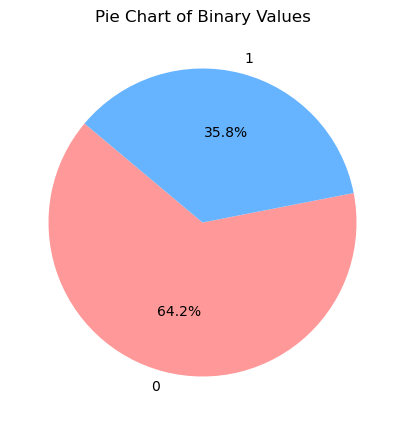

In [16]:
value_counts = df_hrtatt['Heart Attack Risk'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart of Binary Values')
plt.show()

In [17]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,High_BP,Low_BP
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,158,88
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,165,93
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,174,99
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,163,100
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,91,88


In [18]:
df_cat = df_feature.select_dtypes(include = [object])

# display categorical features
df_cat.columns

Index(['Sex', 'Diet', 'Hemisphere'], dtype='object')

In [19]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [20]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [21]:
X = pd.concat([df_num, dummy_var], axis = 1)
# display first five observations
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,High_BP,Low_BP,Sex_Male,Diet_Healthy,Diet_Unhealthy,Hemisphere_Southern Hemisphere
0,67,208,72,0,0,1,0,0,4.168189,0,...,31.251233,286,0,6,158,88,True,False,False,True
1,21,389,98,1,1,1,1,1,1.813242,1,...,27.194973,235,1,7,165,93,True,False,True,False
2,21,324,72,1,0,0,0,0,2.078353,1,...,28.176571,587,4,4,174,99,False,True,False,False
3,84,383,73,1,1,1,0,1,9.828130,1,...,36.464704,378,3,4,163,100,True,False,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,...,21.809144,231,1,5,91,88,True,False,True,False


### Step3. Outlier Handling

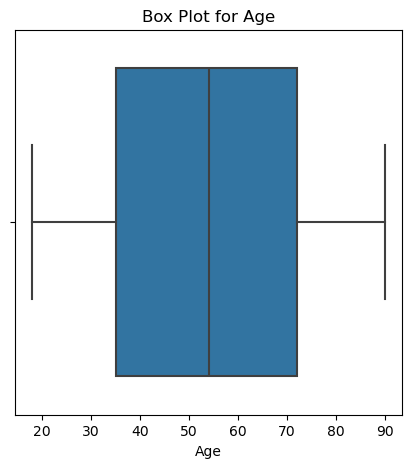

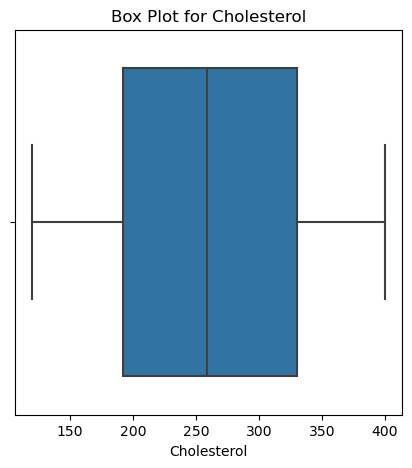

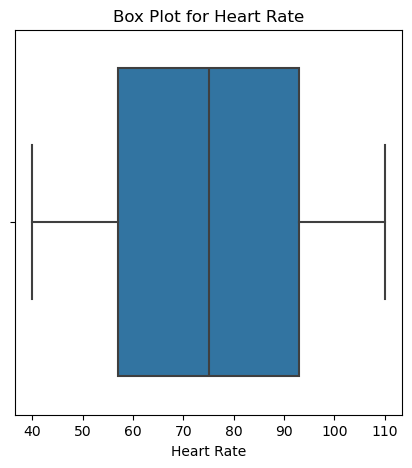

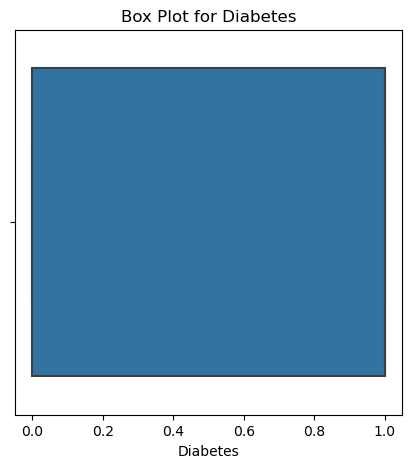

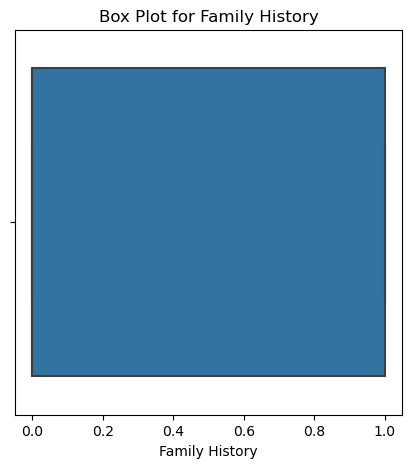

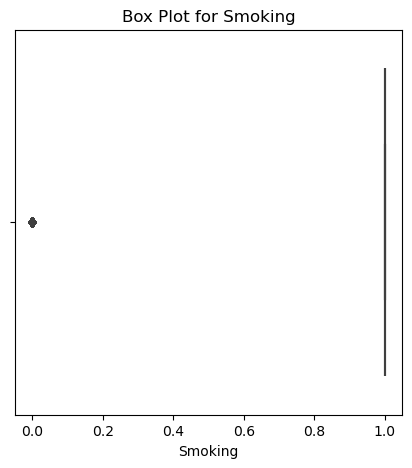

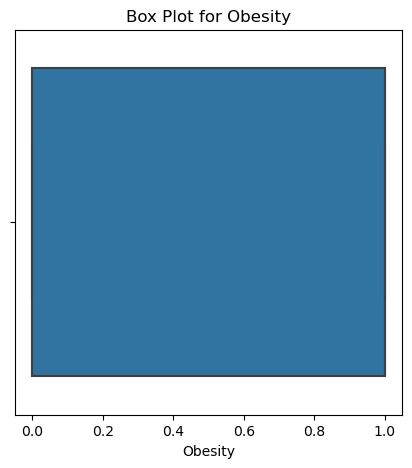

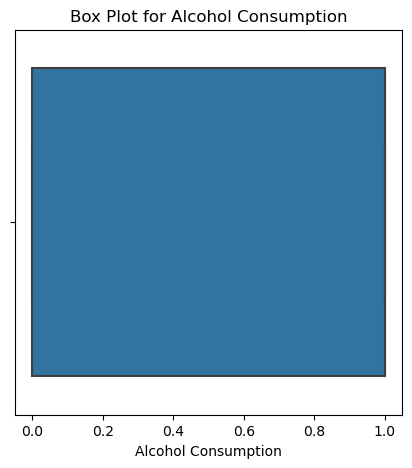

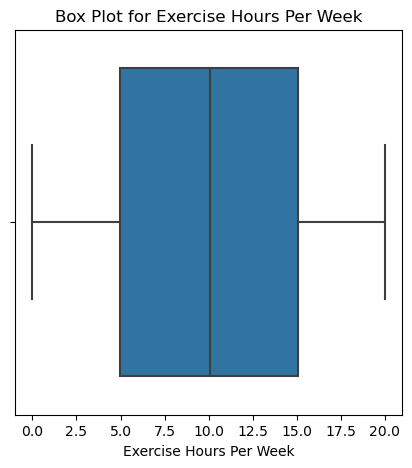

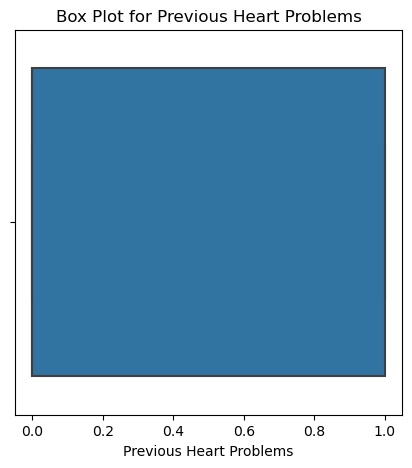

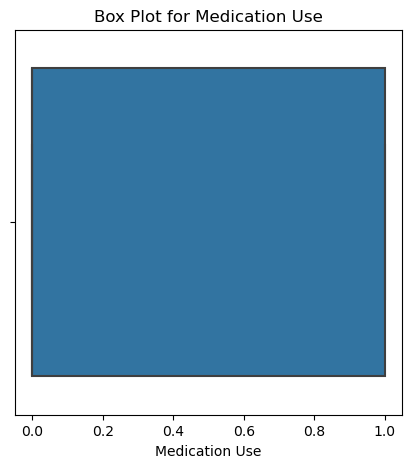

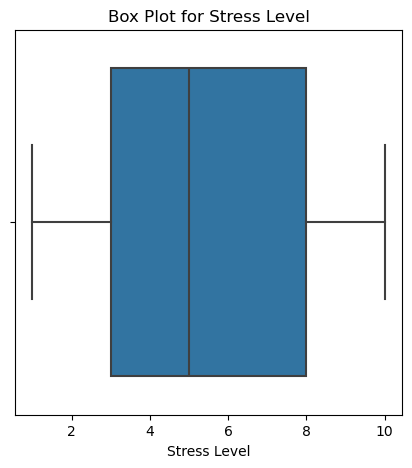

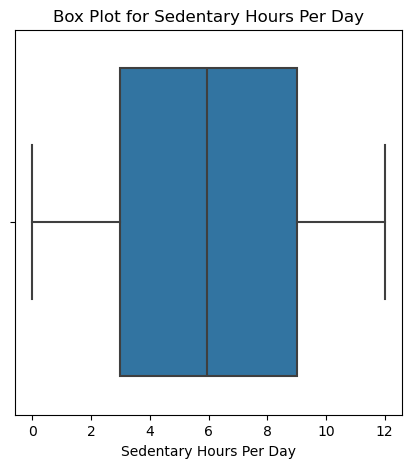

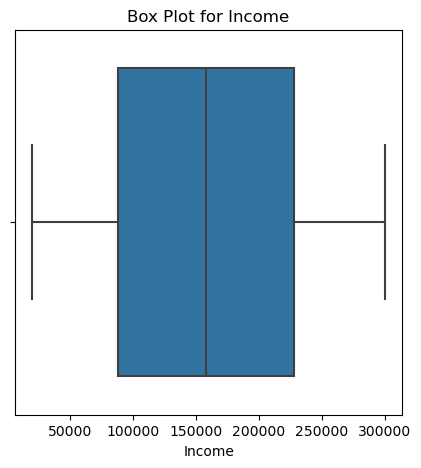

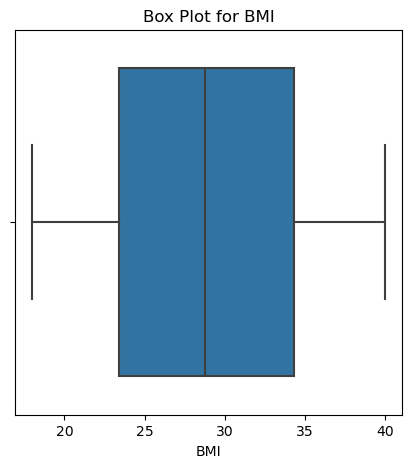

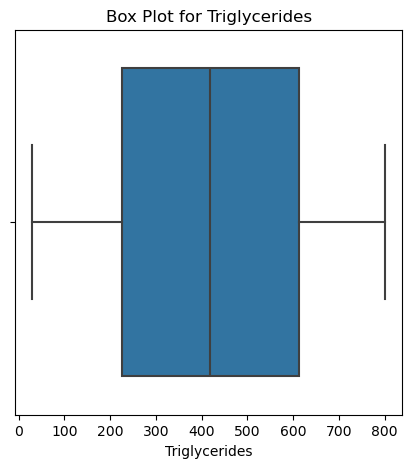

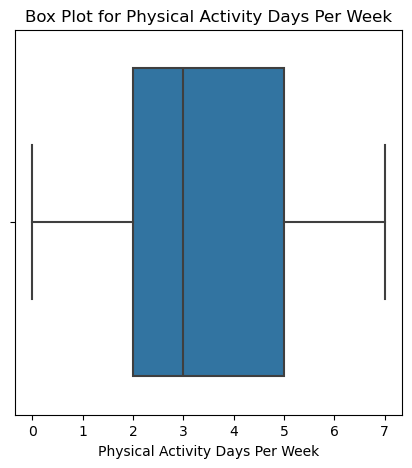

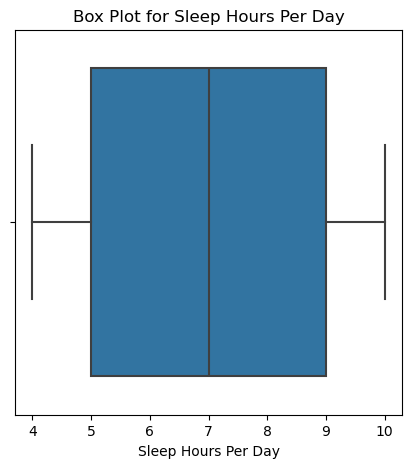

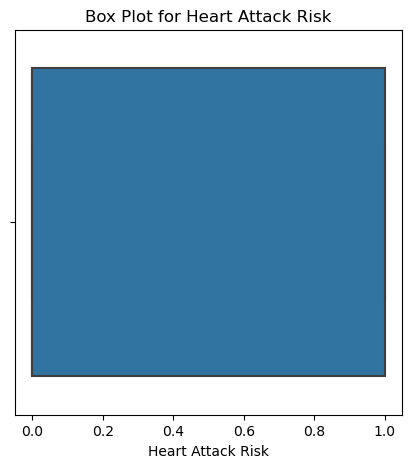

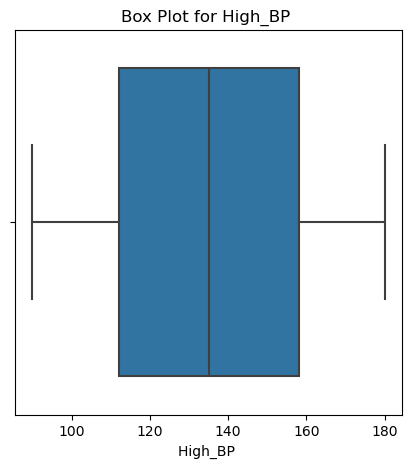

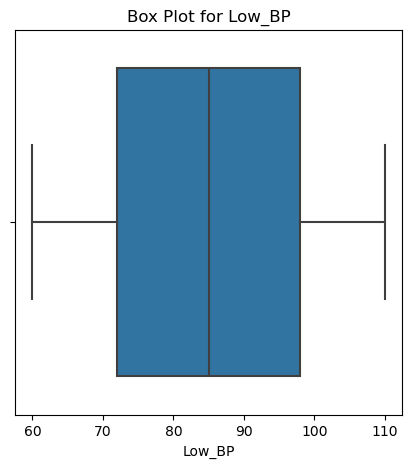

In [22]:
# Identify Outlier Using Box Plot
df_num = df_hrtatt.select_dtypes(include=['number'])

# Create box plots for all numerical columns
for column in df_num.columns:
    plt.figure(figsize=(5, 5))  # Optional: adjust the figure size
    sns.boxplot(x=df_num[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()


***Interpretation***

- `We have no Outliers in the data`



## EDA (Exploratory Data Analysis)

### A. Univariate Analysis

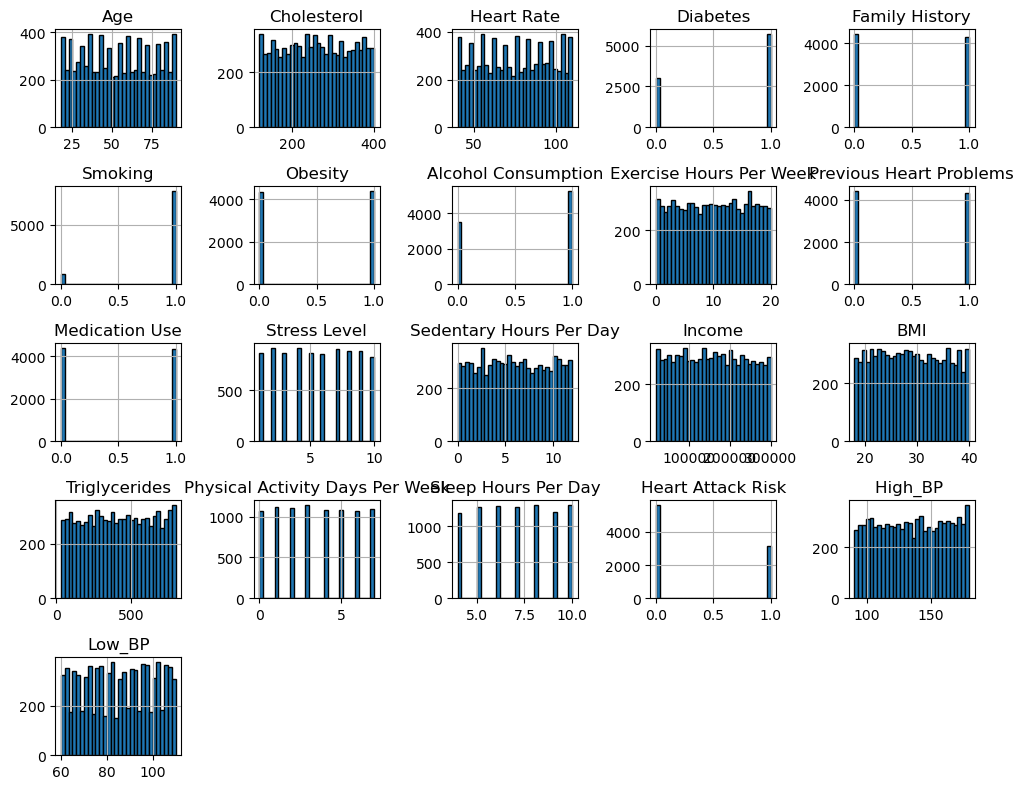

In [23]:
df_num = df_hrtatt.select_dtypes(include=['number'])

# Plot histograms for all numerical columns
df_num.hist(figsize=(10, 8), bins=30, edgecolor='black')

# Display the plot
plt.tight_layout()
plt.show()

### B. Multivariate analysis

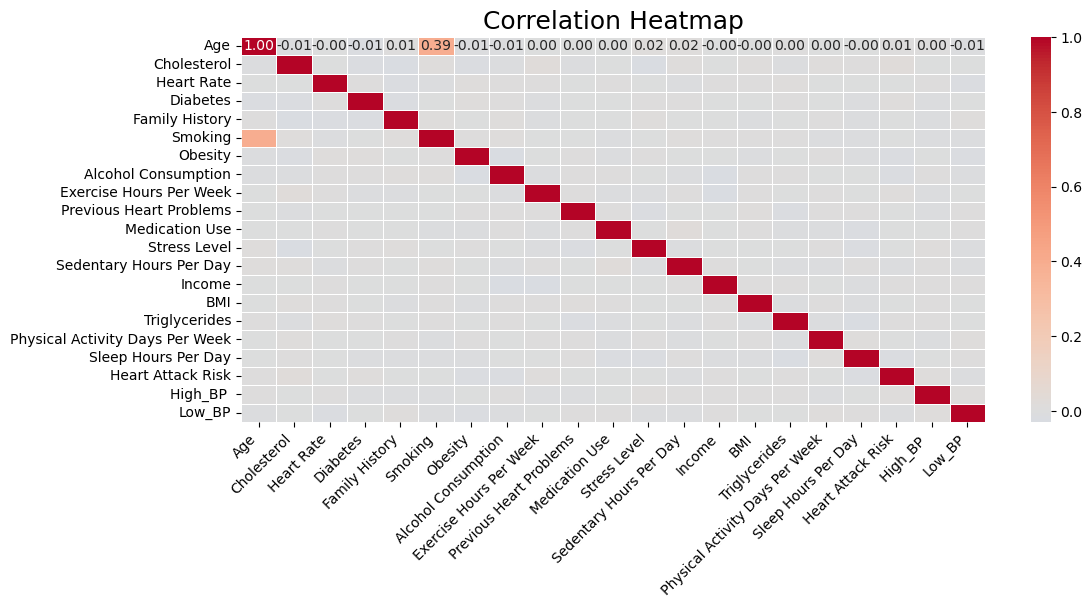

In [24]:
correlation_matrix = df_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()

**interpretation**
- we deduce that most of the data are not correlated and those which are does not have significant impact on each other

# Machine learning Models

In [25]:
# add a constant column to the dataframe
from sklearn.model_selection import train_test_split
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7010, 25)
y_train (7010,)
X_test (1753, 25)
y_test (1753,)


# decision tree classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data
predictions = tree_model.predict(X_test)

# Calculate accuracy

accuracy_dt = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy_dt}')

# Precision
precision = precision_score(y_test, predictions)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1}')



Accuracy: 0.5276668568168853
Precision: 0.35
Recall: 0.3964401294498382
F1 Score: 0.3717754172989378


# random forest classifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Random Forest classifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predict on the testing data
predictions = forest_model.predict(X_test)

# Calculate accuracy
accuracy_ran = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy_ran}')

# Precision
precision = precision_score(y_test, predictions)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1}')



Accuracy: 0.6314888762122076
Precision: 0.22
Recall: 0.01779935275080906
F1 Score: 0.03293413173652695


# logistic regrssion


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Logistic Regression classifier
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
predictions = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy_log}')



Accuracy: 0.6474614945807188


In [35]:
clfs = {
    'clf1': {'name': 'DecisionTreeClassifier'},
    'clf2': {'name': ' RandomForestClassifier'},
    'clf3': {'name': 'LogisticRegression'}
      
}
accuracies = {
    'clf1': accuracy_dt*100,
    'clf2': accuracy_ran*100,
    'clf3': accuracy_log*100
}

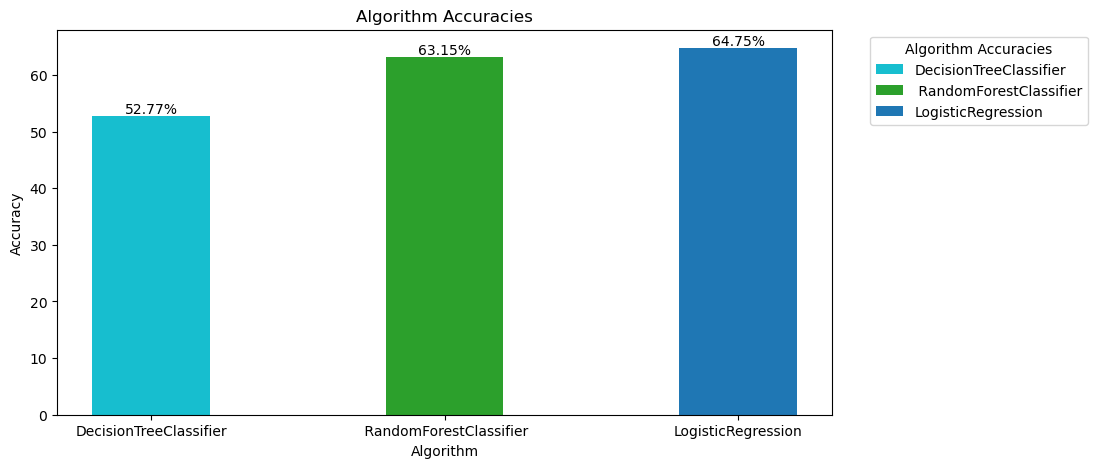

In [36]:
# Initialize the labels and values for the comparison graph
# Initialize the labels and values for the comparison graph
labels = [clfs[clf]['name'] for clf in clfs]
values =  [accuracies[clf] for clf in clfs]

# Set styling variables
label_colors = ['cyan', 'green', 'blue']
bar_colors = ['tab:cyan', 'tab:green', 'tab:blue']

# Define figure and axes objects
fig, ax = plt.subplots(figsize=(10, 5))

# Create a list of bar plots for the graph
bars = ax.bar(labels, values, label=label_colors, color=bar_colors, width=0.4)

# Style the graph
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Algorithm Accuracies')
ax.legend(title='Algorithm Accuracies', labels=labels, bbox_to_anchor=(1.04, 1), loc='upper left')

# Iterate over the bars to add percentages above them
for bar in bars:
    pos_x = bar.get_x() + bar.get_width() / 2.0
    pos_y = bar.get_height()
    str = f'{pos_y:.2f}%'
    plt.text(pos_x, pos_y, str, ha='center', va='bottom')

# Display the bar graph
plt.show()
